In [102]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import lightkurve as lk
import astropy.units as u
import pandas as pd

In [9]:
data = fits.open('background-readings/TESS-HERMES-cvzTICS/tess_hermes_dr1.0.fits')
data.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11a88c0f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11a891d68>]>

In [14]:
data[1].data.shape

(24968,)

In [21]:
hdr = data[1].header
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  330 / length of dimension 1                          
NAXIS2  =                24968 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   41 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'deg     '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '        

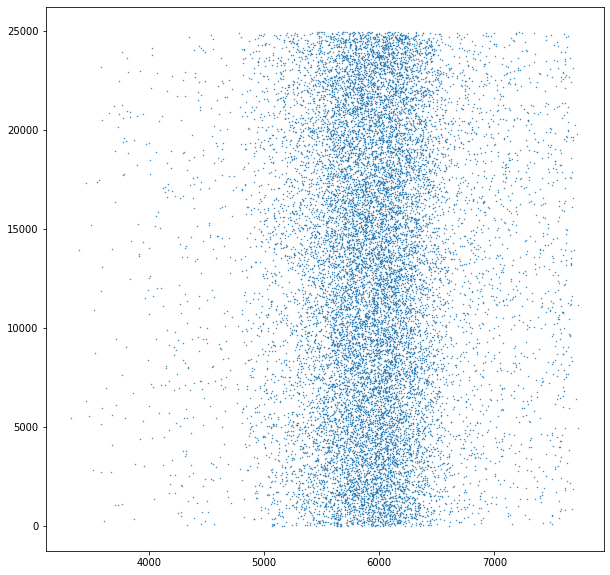

In [106]:
#hdr.keys
temps=[]
for i in data[1].data['teff']:
    temps.append(i)
temps=np.array(temps)
temps.shape


plt.figure(figsize=(10,10))
y = np.arange(0,len(temps),1)
plt.scatter(temps,y,s=0.2)

In [107]:
cool = temps[np.where(temps<4500)] #stars need to be cooler than this to see the period gap
cool.shape

/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(247,)

In [25]:
tics = data[1].data['tic_id']
tics.shape

(24968,)

In [61]:
#how to save data as a csv

df = pd.DataFrame(dict({'tic_id': tics}))
df.to_csv('csv-ticids.csv')

In [63]:
#how to read tics csv file


df = pd.read_csv('csv-ticids.csv')

In [65]:
#how to see data structure


df.tic_id.values #remove .values to get column structure

array([141436215, 364588968, 364589323, ..., 348843627, 278723918,
       278685716])

In [72]:
starnames =[]
for i in tics:
    names = 'TIC ' + str(i)
    starnames.append(names)
starnames = np.array(starnames)
starnames[0:5]


array(['TIC 141436215', 'TIC 364588968', 'TIC 364589323', 'TIC 141436204',
       'TIC 141478874'], dtype='<U13')

In [39]:
starnames[0]

'TIC 141436215'

In [40]:
#starname = "TIC 364588968"

# for stars in starnames:
#     print(stars)
lcf = lk.search_lightcurvefile(starnames[0]).download() #this fcn searches lightcurves, not the raw data



/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:185: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [110]:
for number,stars in enumerate(starnames):
    #print(stars,number)

TIC 141436215 0
TIC 364588968 1
TIC 364589323 2
TIC 141436204 3
TIC 141478874 4
TIC 141436194 5
TIC 364588936 6
TIC 364588931 7
TIC 370233725 8
TIC 141473617 9
TIC 141413517 10
TIC 141526828 11
TIC 141544117 12
TIC 141280863 13
TIC 364588903 14
TIC 141526806 15
TIC 141527349 16
TIC 141280870 17
TIC 407632974 18
TIC 141436149 19
TIC 141333770 20
TIC 141333773 21
TIC 141280482 22
TIC 364588881 23
TIC 141527373 24
TIC 364589399 25
TIC 364589401 26
TIC 141268238 27
TIC 364588865 28
TIC 141544737 29
TIC 141414043 30
TIC 407663737 31
TIC 370233636 32
TIC 141333808 33
TIC 141544753 34
TIC 141544050 35
TIC 141527398 36
TIC 141544048 37
TIC 141473546 38
TIC 141544766 39
TIC 364588836 40
TIC 141610136 41
TIC 141268262 42
TIC 141473538 43
TIC 141280450 44
TIC 141436096 45
TIC 141544784 46
TIC 141544786 47
TIC 141436075 48
TIC 141280920 49
TIC 141413413 50
TIC 141267791 51
TIC 364589473 52
TIC 370233577 53
TIC 141473518 54
TIC 141268280 55
TIC 364589484 56
TIC 364588805 57
TIC 141527453 58
TIC 141

TIC 271694806 1900
TIC 271722899 1901
TIC 177242602 1902
TIC 140759141 1903
TIC 140943897 1904
TIC 141682021 1905
TIC 271976592 1906
TIC 140970753 1907
TIC 177283525 1908
TIC 140802930 1909
TIC 177348855 1910
TIC 271798086 1911
TIC 271976601 1912
TIC 176873930 1913
TIC 141625159 1914
TIC 271971045 1915
TIC 141621979 1916
TIC 177288280 1917
TIC 33838789 1918
TIC 177288282 1919
TIC 271809129 1920
TIC 140939592 1921
TIC 370236388 1922
TIC 177308573 1923
TIC 271798072 1924
TIC 271893239 1925
TIC 177258667 1926
TIC 33863985 1927
TIC 177350773 1928
TIC 358111553 1929
TIC 370221742 1930
TIC 177385479 1931
TIC 177348872 1932
TIC 140577305 1933
TIC 140527022 1934
TIC 272087529 1935
TIC 370221749 1936
TIC 177350769 1937
TIC 140759089 1938
TIC 142144401 1939
TIC 271722924 1940
TIC 141768083 1941
TIC 271795988 1942
TIC 370221759 1943
TIC 140939611 1944
TIC 177283493 1945
TIC 272085228 1946
TIC 177387399 1947
TIC 271724935 1948
TIC 177308555 1949
TIC 140943831 1950
TIC 33865478 1951
TIC 407616323 1

TIC 30400653 3753
TIC 167362297 3754
TIC 300160400 3755
TIC 300811915 3756
TIC 300160031 3757
TIC 294785164 3758
TIC 453097831 3759
TIC 453078978 3760
TIC 300812315 3761
TIC 177076379 3762
TIC 294625560 3763
TIC 294625561 3764
TIC 300655511 3765
TIC 167416321 3766
TIC 30194399 3767
TIC 166975497 3768
TIC 299901276 3769
TIC 300967571 3770
TIC 391890293 3771
TIC 41176285 3772
TIC 167439533 3773
TIC 300655946 3774
TIC 294785844 3775
TIC 177017182 3776
TIC 453078991 3777
TIC 284197055 3778
TIC 300557619 3779
TIC 177033450 3780
TIC 25155998 3781
TIC 176930750 3782
TIC 177017179 3783
TIC 300033312 3784
TIC 166975502 3785
TIC 176930753 3786
TIC 29780197 3787
TIC 167089966 3788
TIC 177033852 3789
TIC 167204702 3790
TIC 167249993 3791
TIC 167204699 3792
TIC 299945772 3793
TIC 167164631 3794
TIC 391901975 3795
TIC 231094892 3796
TIC 167089959 3797
TIC 167249989 3798
TIC 300033318 3799
TIC 25152790 3800
TIC 167204694 3801
TIC 167250442 3802
TIC 177162432 3803
TIC 300137296 3804
TIC 29760556 3805


TIC 389617681 5605
TIC 231079470 5606
TIC 167206378 5607
TIC 300327828 5608
TIC 300240528 5609
TIC 373773992 5610
TIC 167251596 5611
TIC 167344092 5612
TIC 300159024 5613
TIC 167044412 5614
TIC 231077147 5615
TIC 280040326 5616
TIC 370103351 5617
TIC 231123467 5618
TIC 176936887 5619
TIC 167338503 5620
TIC 177161427 5621
TIC 300443565 5622
TIC 389439794 5623
TIC 30266585 5624
TIC 167088549 5625
TIC 167165923 5626
TIC 167417549 5627
TIC 373519755 5628
TIC 177075371 5629
TIC 177034838 5630
TIC 300810780 5631
TIC 167338509 5632
TIC 167417551 5633
TIC 177161418 5634
TIC 167368634 5635
TIC 177018400 5636
TIC 404799472 5637
TIC 177023673 5638
TIC 373774264 5639
TIC 40664540 5640
TIC 31270453 5641
TIC 389749457 5642
TIC 30941998 5643
TIC 167248904 5644
TIC 294929258 5645
TIC 300289841 5646
TIC 31315386 5647
TIC 167127056 5648
TIC 167344064 5649
TIC 177238844 5650
TIC 370115793 5651
TIC 30941982 5652
TIC 167127053 5653
TIC 177018407 5654
TIC 294868228 5655
TIC 453099356 5656
TIC 300939255 5657

TIC 31413150 7457
TIC 177082444 7458
TIC 453100175 7459
TIC 370114457 7460
TIC 370100001 7461
TIC 25132325 7462
TIC 177160604 7463
TIC 453100177 7464
TIC 30724654 7465
TIC 300158270 7466
TIC 300382988 7467
TIC 25133955 7468
TIC 31103007 7469
TIC 300239742 7470
TIC 294781518 7471
TIC 177022926 7472
TIC 300158268 7473
TIC 300444373 7474
TIC 41034257 7475
TIC 299943686 7476
TIC 300243639 7477
TIC 40272564 7478
TIC 287404500 7479
TIC 373917373 7480
TIC 391811600 7481
TIC 389862249 7482
TIC 300707341 7483
TIC 389562276 7484
TIC 276790612 7485
TIC 25132319 7486
TIC 277026877 7487
TIC 300014186 7488
TIC 25132318 7489
TIC 31272427 7490
TIC 373607544 7491
TIC 177022914 7492
TIC 300326996 7493
TIC 41087815 7494
TIC 167339397 7495
TIC 300382973 7496
TIC 277026900 7497
TIC 300444387 7498
TIC 25133959 7499
TIC 300511407 7500
TIC 30847954 7501
TIC 167303374 7502
TIC 370114422 7503
TIC 167166946 7504
TIC 177116109 7505
TIC 31510160 7506
TIC 167364354 7507
TIC 167339407 7508
TIC 167367985 7509
TIC 389

TIC 300325964 9200
TIC 41230597 9201
TIC 300379682 9202
TIC 167306352 9203
TIC 167367091 9204
TIC 300381844 9205
TIC 294753771 9206
TIC 176935218 9207
TIC 299942777 9208
TIC 177180061 9209
TIC 167306344 9210
TIC 25134400 9211
TIC 300741405 9212
TIC 25134401 9213
TIC 231074323 9214
TIC 31603505 9215
TIC 391893144 9216
TIC 300746177 9217
TIC 294779717 9218
TIC 167419157 9219
TIC 300971346 9220
TIC 25131908 9221
TIC 29759161 9222
TIC 167420801 9223
TIC 391893148 9224
TIC 177180069 9225
TIC 176958489 9226
TIC 177081463 9227
TIC 300741425 9228
TIC 25131905 9229
TIC 299940963 9230
TIC 388129354 9231
TIC 300013217 9232
TIC 300288035 9233
TIC 231090837 9234
TIC 29835227 9235
TIC 231074335 9236
TIC 300934663 9237
TIC 300652228 9238
TIC 29759153 9239
TIC 453101418 9240
TIC 31307983 9241
TIC 300864451 9242
TIC 300037893 9243
TIC 370041453 9244
TIC 167419169 9245
TIC 167340438 9246
TIC 300866871 9247
TIC 294667105 9248
TIC 176956718 9249
TIC 294667108 9250
TIC 176956721 9251
TIC 29778607 9252
TIC 

TIC 167420077 11034
TIC 176984041 11035
TIC 300164042 11036
TIC 306469197 11037
TIC 41232502 11038
TIC 30469660 11039
TIC 300141251 11040
TIC 300325001 11041
TIC 30312254 11042
TIC 167305319 11043
TIC 167341452 11044
TIC 31513862 11045
TIC 300287147 11046
TIC 300286921 11047
TIC 300972377 11048
TIC 300936002 11049
TIC 41335608 11050
TIC 40975660 11051
TIC 31110465 11052
TIC 167420065 11053
TIC 306579076 11054
TIC 30854562 11055
TIC 31513858 11056
TIC 176983844 11057
TIC 41591646 11058
TIC 167009526 11059
TIC 177166530 11060
TIC 167305330 11061
TIC 300606074 11062
TIC 30854573 11063
TIC 41591638 11064
TIC 300742545 11065
TIC 300446544 11066
TIC 31110916 11067
TIC 167123503 11068
TIC 40975646 11069
TIC 176983860 11070
TIC 31110489 11071
TIC 176934233 11072
TIC 300446538 11073
TIC 167169313 11074
TIC 300141450 11075
TIC 306774530 11076
TIC 306827461 11077
TIC 176934237 11078
TIC 306774533 11079
TIC 29989630 11080
TIC 31110504 11081
TIC 300972415 11082
TIC 167009310 11083
TIC 41488290 1108

TIC 349785950 12999
TIC 349832541 13000
TIC 410446511 13001
TIC 358460566 13002
TIC 38461400 13003
TIC 167653758 13004
TIC 410446514 13005
TIC 150513135 13006
TIC 349156012 13007
TIC 410486974 13008
TIC 38608252 13009
TIC 167792843 13010
TIC 382520251 13011
TIC 349785947 13012
TIC 167888669 13013
TIC 350027290 13014
TIC 293220470 13015
TIC 348960111 13016
TIC 38824414 13017
TIC 167694961 13018
TIC 349407964 13019
TIC 38468688 13020
TIC 348895694 13021
TIC 150361911 13022
TIC 167694967 13023
TIC 150361909 13024
TIC 349094056 13025
TIC 167794296 13026
TIC 167809256 13027
TIC 349196537 13028
TIC 350096522 13029
TIC 38587275 13030
TIC 38697559 13031
TIC 150433707 13032
TIC 348897153 13033
TIC 150324787 13034
TIC 348995018 13035
TIC 372909649 13036
TIC 55384319 13037
TIC 349788082 13038
TIC 55273436 13039
TIC 308399199 13040
TIC 349834710 13041
TIC 55384314 13042
TIC 372852125 13043
TIC 167794304 13044
TIC 308396847 13045
TIC 167792819 13046
TIC 349966029 13047
TIC 364422621 13048
TIC 34996

TIC 38698671 13670
TIC 150320401 13671
TIC 167693095 13672
TIC 281633662 13673
TIC 150390720 13674
TIC 349522844 13675
TIC 38570944 13676
TIC 55649843 13677
TIC 167601211 13678
TIC 349478618 13679
TIC 382625573 13680
TIC 38601680 13681
TIC 38824218 13682
TIC 167652097 13683
TIC 55453800 13684
TIC 55851822 13685
TIC 38515901 13686
TIC 55653353 13687
TIC 349647302 13688
TIC 349059635 13689
TIC 349304592 13690
TIC 349764311 13691
TIC 358460993 13692
TIC 410446871 13693
TIC 150395172 13694
TIC 167749692 13695
TIC 55782840 13696
TIC 349966400 13697
TIC 55649851 13698
TIC 349157885 13699
TIC 372910028 13700
TIC 150428957 13701
TIC 38570936 13702
TIC 55299800 13703
TIC 293347563 13704
TIC 382625560 13705
TIC 349832149 13706
TIC 349095939 13707
TIC 167549998 13708
TIC 167652086 13709
TIC 348960365 13710
TIC 349481187 13711
TIC 281633679 13712
TIC 150298300 13713
TIC 349832146 13714
TIC 38698680 13715
TIC 55498577 13716
TIC 308396431 13717
TIC 358461008 13718
TIC 358461009 13719
TIC 38681032 13

TIC 167570413 15398
TIC 167601729 15399
TIC 149976395 15400
TIC 281630166 15401
TIC 38906965 15402
TIC 350142435 15403
TIC 150429521 15404
TIC 38424054 15405
TIC 38828658 15406
TIC 55650331 15407
TIC 150167596 15408
TIC 150190691 15409
TIC 375055531 15410
TIC 372851283 15411
TIC 348960980 15412
TIC 150320891 15413
TIC 167570403 15414
TIC 281630156 15415
TIC 374944052 15416
TIC 149989895 15417
TIC 167808415 15418
TIC 349646537 15419
TIC 372851277 15420
TIC 349572325 15421
TIC 349902807 15422
TIC 358710273 15423
TIC 348995919 15424
TIC 349519628 15425
TIC 349646533 15426
TIC 382516984 15427
TIC 349831298 15428
TIC 150275316 15429
TIC 55851166 15430
TIC 150361131 15431
TIC 293221900 15432
TIC 349765098 15433
TIC 149903299 15434
TIC 348957754 15435
TIC 349784732 15436
TIC 349789306 15437
TIC 349902813 15438
TIC 167792080 15439
TIC 38508185 15440
TIC 150439334 15441
TIC 150439335 15442
TIC 348897925 15443
TIC 349784728 15444
TIC 38466303 15445
TIC 149934854 15446
TIC 150320901 15447
TIC 150

TIC 349571280 17372
TIC 349972178 17373
TIC 150028976 17374
TIC 167812449 17375
TIC 55558216 17376
TIC 349306202 17377
TIC 150190069 17378
TIC 382506531 17379
TIC 167604506 17380
TIC 167696508 17381
TIC 55652313 17382
TIC 349154295 17383
TIC 348894119 17384
TIC 149935480 17385
TIC 167755184 17386
TIC 349790451 17387
TIC 348961771 17388
TIC 150323471 17389
TIC 262609988 17390
TIC 149971754 17391
TIC 349645422 17392
TIC 350092076 17393
TIC 38574091 17394
TIC 38586374 17395
TIC 374858540 17396
TIC 348961777 17397
TIC 349193086 17398
TIC 149976991 17399
TIC 38680197 17400
TIC 38696629 17401
TIC 167602384 17402
TIC 167891847 17403
TIC 149902613 17404
TIC 55270629 17405
TIC 38517873 17406
TIC 349409956 17407
TIC 349409957 17408
TIC 349678940 17409
TIC 281582784 17410
TIC 150247543 17411
TIC 410448834 17412
TIC 374944737 17413
TIC 167604492 17414
TIC 349571262 17415
TIC 167698742 17416
TIC 382506571 17417
TIC 167752910 17418
TIC 38585126 17419
TIC 38517876 17420
TIC 150247548 17421
TIC 349154

TIC 350140063 19201
TIC 149601140 19202
TIC 150392618 19203
TIC 293345535 19204
TIC 348962652 19205
TIC 375056980 19206
TIC 150300076 19207
TIC 38763343 19208
TIC 167656694 19209
TIC 374911485 19210
TIC 150300079 19211
TIC 167723837 19212
TIC 348899507 19213
TIC 150322181 19214
TIC 350138995 19215
TIC 364324766 19216
TIC 374859540 19217
TIC 38827544 19218
TIC 38711157 19219
TIC 349152663 19220
TIC 55557731 19221
TIC 349828877 19222
TIC 364325317 19223
TIC 375033326 19224
TIC 55651429 19225
TIC 348963387 19226
TIC 349153434 19227
TIC 149538987 19228
TIC 55522780 19229
TIC 350032195 19230
TIC 167526599 19231
TIC 167574783 19232
TIC 167813368 19233
TIC 38695861 19234
TIC 149497658 19235
TIC 350139008 19236
TIC 150273402 19237
TIC 167697959 19238
TIC 38695864 19239
TIC 358806633 19240
TIC 149472867 19241
TIC 149497662 19242
TIC 38633312 19243
TIC 150322756 19244
TIC 149601539 19245
TIC 350140024 19246
TIC 149601538 19247
TIC 349192079 19248
TIC 374859532 19249
TIC 349828850 19250
TIC 38707

TIC 381949628 20961
TIC 260507684 20962
TIC 260610147 20963
TIC 220401754 20964
TIC 279424256 20965
TIC 340135518 20966
TIC 278683273 20967
TIC 350479121 20968
TIC 279090267 20969
TIC 278683278 20970
TIC 279475335 20971
TIC 339891753 20972
TIC 220389494 20973
TIC 278729713 20974
TIC 279251651 20975
TIC 339669756 20976
TIC 220477567 20977
TIC 278897707 20978
TIC 260502025 20979
TIC 279615642 20980
TIC 339669749 20981
TIC 260653963 20982
TIC 279251655 20983
TIC 279323866 20984
TIC 220461288 20985
TIC 350344082 20986
TIC 350344081 20987
TIC 350520045 20988
TIC 279218871 20989
TIC 339891748 20990
TIC 381949620 20991
TIC 281496413 20992
TIC 220421860 20993
TIC 220474336 20994
TIC 220436020 20995
TIC 260536945 20996
TIC 260476534 20997
TIC 279615636 20998
TIC 220395493 20999
TIC 279250728 21000
TIC 339771517 21001
TIC 260420373 21002
TIC 339732660 21003
TIC 220428397 21004
TIC 278863262 21005
TIC 339633221 21006
TIC 350520038 21007
TIC 279323859 21008
TIC 279218881 21009
TIC 279570640 21010


TIC 279355856 22783
TIC 279569823 22784
TIC 294153653 22785
TIC 279430604 22786
TIC 220478453 22787
TIC 220422259 22788
TIC 260541852 22789
TIC 294275044 22790
TIC 293936048 22791
TIC 381976895 22792
TIC 279430600 22793
TIC 279614756 22794
TIC 381975024 22795
TIC 294092729 22796
TIC 279572509 22797
TIC 287274194 22798
TIC 278956850 22799
TIC 279361299 22800
TIC 339634219 22801
TIC 220414275 22802
TIC 260537604 22803
TIC 279355869 22804
TIC 294092741 22805
TIC 220424527 22806
TIC 260654670 22807
TIC 279482713 22808
TIC 260506994 22809
TIC 278683974 22810
TIC 279477167 22811
TIC 220480850 22812
TIC 381976906 22813
TIC 278776453 22814
TIC 260609465 22815
TIC 260636198 22816
TIC 279477170 22817
TIC 220424523 22818
TIC 279091996 22819
TIC 260541837 22820
TIC 278959048 22821
TIC 339668724 22822
TIC 220429284 22823
TIC 294153688 22824
TIC 339668717 22825
TIC 260654680 22826
TIC 348839854 22827
TIC 294092762 22828
TIC 294326673 22829
TIC 293974938 22830
TIC 294397901 22831
TIC 278956827 22832


TIC 279246061 24703
TIC 278955465 24704
TIC 279213509 24705
TIC 278685116 24706
TIC 278955463 24707
TIC 279156792 24708
TIC 278826115 24709
TIC 278861218 24710
TIC 279093474 24711
TIC 348843066 24712
TIC 278724996 24713
TIC 279213538 24714
TIC 278775207 24715
TIC 278900599 24716
TIC 348838695 24717
TIC 278685143 24718
TIC 278992503 24719
TIC 278779973 24720
TIC 279087868 24721
TIC 348838689 24722
TIC 278900608 24723
TIC 279213552 24724
TIC 278960333 24725
TIC 260655941 24726
TIC 278821307 24727
TIC 279213555 24728
TIC 278685154 24729
TIC 348838680 24730
TIC 279056582 24731
TIC 278685159 24732
TIC 278895603 24733
TIC 279246132 24734
TIC 260639121 24735
TIC 278992527 24736
TIC 278861175 24737
TIC 279093512 24738
TIC 279156716 24739
TIC 260637382 24740
TIC 278780001 24741
TIC 260657685 24742
TIC 278861168 24743
TIC 278992541 24744
TIC 278775158 24745
TIC 348843123 24746
TIC 279087820 24747
TIC 279156705 24748
TIC 279215608 24749
TIC 260639095 24750
TIC 278895567 24751
TIC 278731652 24752


In [41]:
#not sure i need, but this is for 2min cadence targets and thats what i want
from lightkurve import TessTargetPixelFile



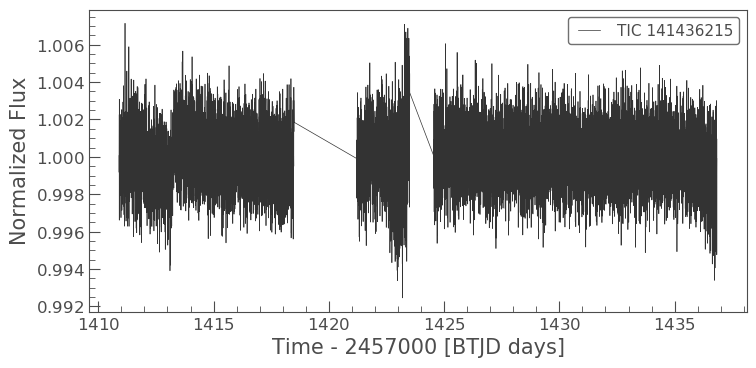

In [73]:
lc.plot()

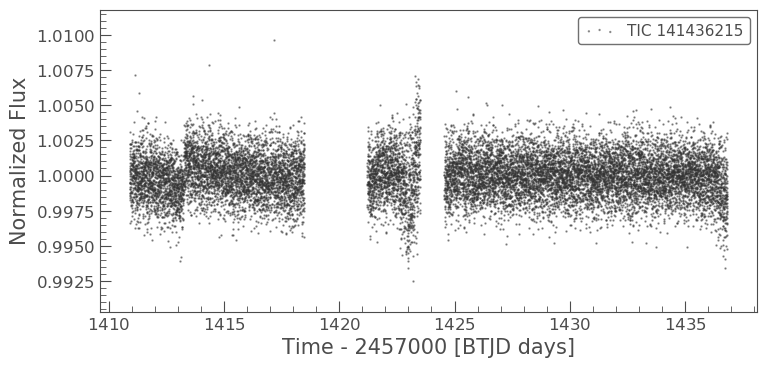

In [42]:
lc = lcf.PDCSAP_FLUX
lc.scatter(alpha=.5, s=.5);

In [45]:
lcf??

In [70]:
#trying to transform to a periodogram

lc = lc.normalize().remove_nans().remove_outliers()
#p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=400, min_frequency=10)
p = lc.to_periodogram(freq_unit=(1/(u.s*24*60*60)), max_frequency=10, min_frequency=(1/20.))



/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:733: LightkurveWarning: `min_frequency` keyword is deprecated, please use `minimum_frequency` instead.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:738: LightkurveWarning: `max_frequency` keyword is deprecated, please use `maximum_frequency` instead.
  LightkurveWarning)


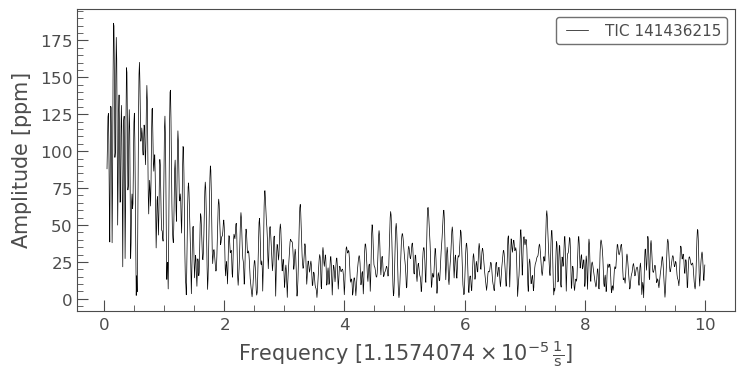

In [71]:
ax = p.plot(c='k');
